#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 218197069

# Student name:THAO NGUYEN




##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers


In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Smart-PC'

In [58]:
#Read CSV file: "\\" change to "/"
df = pd.read_csv("housing_dataset.csv")
df.head()

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,families,average_income,ocean_proximity,house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [62]:
#Data exploration
df.columns = df.columns.str.upper()
df.columns
df.head()

,LONGITUDE,LATITUDE,HOUSING_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,FAMILIES,AVERAGE_INCOME,OCEAN_PROXIMITY,HOUSE_VALUE
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [63]:
#Missing data in Total_bedrooms
df.isnull().any()

#Total number of missing values : 207
df.isnull().sum()

LONGITUDE            0
LATITUDE             0
HOUSING_AGE          0
TOTAL_ROOMS          0
TOTAL_BEDROOMS     207
POPULATION           0
FAMILIES             0
AVERAGE_INCOME       0
OCEAN_PROXIMITY      0
HOUSE_VALUE          0
dtype: int64

In [64]:
#Filling the missing data with mean value
df_with_mean = df.TOTAL_BEDROOMS.fillna(df['TOTAL_BEDROOMS'].mean())
df_with_mean 

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: TOTAL_BEDROOMS, Length: 20640, dtype: float64



##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [98]:
import scipy.spatial.distance as dist
for i in range(len(df)):
    df.loc[i,'Euclidean'] = dist.euclidean(df.iloc[0,0:2],df.iloc[i,0:2])
df.head(10)

,LONGITUDE,LATITUDE,HOUSING_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,FAMILIES,AVERAGE_INCOME,OCEAN_PROXIMITY,HOUSE_VALUE,Population density per family,cheapest_price_per_room,Euclidean
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,2.555556,514.32,0.000000
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,2.109842,50.50,0.022361
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,2.802260,240.01,0.031623
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,2.547945,267.90,0.036056
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,2.181467,210.33,0.036056
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,2.139896,293.47,0.036056
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,2.128405,118.03,0.044721
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400,1.788253,77.77,0.044721
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700,2.026891,88.73,0.050000
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100,2.172269,73.57,0.044721


In [96]:
df.loc[df['Euclidean']==df.loc[2:,'Euclidean'].min()]

,LONGITUDE,LATITUDE,HOUSING_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,FAMILIES,AVERAGE_INCOME,OCEAN_PROXIMITY,HOUSE_VALUE,Population density per family,cheapest_price_per_room,Euclidean
1633,-122.22,37.88,20,95,13.0,31,15,2.4444,NEAR BAY,475000,2.066667,5000.0,0.01


In [97]:
df.loc[df['Euclidean']==df.loc[2:,'Euclidean'].max()]

,LONGITUDE,LATITUDE,HOUSING_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,FAMILIES,AVERAGE_INCOME,OCEAN_PROXIMITY,HOUSE_VALUE,Population density per family,cheapest_price_per_room,Euclidean
2780,-114.55,32.8,19,2570,820.0,1431,608,1.275,INLAND,56100,2.353618,21.83,9.208083


2.   Calculate the average age of the house blocks near the ocean.

In [75]:
Average = df.groupby('OCEAN_PROXIMITY')['HOUSING_AGE'].mean()
print('The average age of the house blocks near the ocean is', Average['NEAR OCEAN'])

The average age of the house blocks near the ocean is 29.347253574115875


3.   Find the income of the housing block with the most and least population density (per family).

In [68]:
# Population density per family = dfnew
dfnew =df['POPULATION']/df['FAMILIES']
dfnew
df['Population density per family']=dfnew

# The most 
dfnew_max = max(dfnew)
Income_max =df.loc[df['Population density per family'] == dfnew_max, 'AVERAGE_INCOME'].item()

print('The most population density per family is',round(dfnew_max,2), "and the income of the housing block is", round(Income_max,2))


# The least
dfnew_min = min(dfnew)
Income_min =df.loc[df['Population density per family'] == dfnew_min, 'AVERAGE_INCOME'].item()

print('The least population density per family is',round(dfnew_min,2), "and the income of the housing block is", round(Income_min,2))

The most population density per family is 1243.33 and the income of the housing block is 10.23
The least population density per family is 0.69 and the income of the housing block is 2.59


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [69]:
#The oldest
price_oldest =df.loc[df['HOUSING_AGE'] == df['HOUSING_AGE'].max(),'HOUSE_VALUE'].mean()
print('The price of the oldest housing block is $', round(price_oldest,2))

#The latest
price_latest =df.loc[df['HOUSING_AGE']== df['HOUSING_AGE'].min(), 'HOUSE_VALUE'].mean()
print('The price of the latest housing block is $', round(price_latest,2))

#The price difference
print('The price difference between the latest and oldest housing block from the dataset is $', round(price_latest - price_oldest,2))

The price of the oldest housing block is $ 275420.87
The price of the latest housing block is $ 144300.0
The price difference between the latest and oldest housing block from the dataset is $ -131120.87


5.   Calculate the cheapest price per room from the dataset.

In [99]:
cheapest_price_per_room  =round(df['HOUSE_VALUE']/df['TOTAL_ROOMS'],2)
df['cheapest_price_per_room']= cheapest_price_per_room
df.head(10)

,LONGITUDE,LATITUDE,HOUSING_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,FAMILIES,AVERAGE_INCOME,OCEAN_PROXIMITY,HOUSE_VALUE,Population density per family,cheapest_price_per_room,Euclidean
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,2.555556,514.32,0.000000
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,2.109842,50.50,0.022361
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,2.802260,240.01,0.031623
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,2.547945,267.90,0.036056
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,2.181467,210.33,0.036056
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,2.139896,293.47,0.036056
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,2.128405,118.03,0.044721
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400,1.788253,77.77,0.044721
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700,2.026891,88.73,0.050000
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100,2.172269,73.57,0.044721


6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [210]:
#The owner of an expensive house is the owner of a valuable property and the high value of the property expresses the owner's wealthy.
#Therefore, wealthy is defined on house_value. 

#The least wealthy 
least =df.loc[df['HOUSE_VALUE']== df['HOUSE_VALUE'].min(), 'dfnew']
print ('The least wealthy housing blocks is')
print(least)

#The most wealthy
Most =df.loc[df['HOUSE_VALUE']== df['HOUSE_VALUE'].max(), 'dfnew']
print ('The most wealthy housing blocks is')
print(Most)

The least wealthy housing blocks is
2521     2.236842
2799     2.987805
9188     2.791111
19802    2.250000
Name: dfnew, dtype: float64
The most wealthy housing blocks is
89       4.658824
459      5.396000
493      2.415888
494      2.754032
509      2.623269
           ...   
20422    2.666667
20426    3.487395
20427    2.553439
20436    3.177898
20443    3.714286
Name: dfnew, Length: 965, dtype: float64


7.   Calculate and print the total housing blocks located in the same place.

In [146]:
Total = df.groupby('OCEAN_PROXIMITY')['OCEAN_PROXIMITY'].count()
print('The total housing blocks located in the same place is', Total)

The total housing blocks located in the same place is OCEAN_PROXIMITY
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: OCEAN_PROXIMITY, dtype: int64


8.   Calculate the price of expensive room grouped by ocean proximity.

In [208]:
PProom= df['HOUSE_VALUE']/df['TOTAL_ROOMS']
df['Price per room']= PProom

#Maximum price
MPrice= df.groupby('OCEAN_PROXIMITY')['Price per room'].max()

print ('the most expensive room:', round(MPrice,2))


the most expensive room: OCEAN_PROXIMITY
<1H OCEAN     22500.00
INLAND        68750.00
ISLAND          451.81
NEAR BAY      62500.12
NEAR OCEAN    23333.33
Name: Price per room, dtype: float64


##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

Text(0.5, 1.0, 'Scatter plot of the population against ocean proximity')

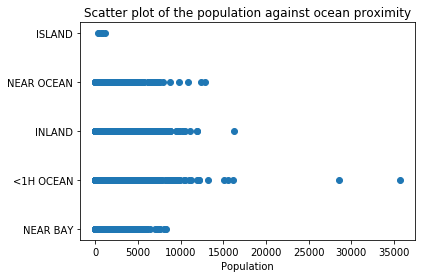

In [48]:
#Population against ocean proximity
plt.scatter(df['POPULATION'], df['OCEAN_PROXIMITY'])
plt.xlabel('Population')
plt.title('Scatter plot of the population against ocean proximity')
#From the graph, we can conclude that only a small number of people tend to live in island and the majority prefers living near ocean, <1h ocean, near bay or inland.

Text(0.5, 1.0, 'Scatter plot of the population against housing age')

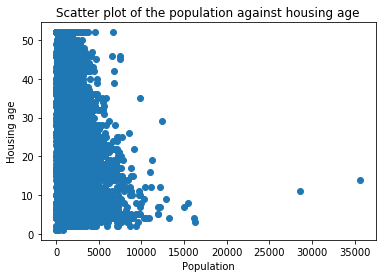

In [45]:
#Population against housing age
plt.scatter(df['POPULATION'], df['HOUSING_AGE'])
plt.xlabel('Population')
plt.ylabel('Housing age')
plt.title('Scatter plot of the population against housing age')
#From the graph, we can conclude that the population density distribution is fairly spread by housing age. However, it is also revealed the younger age of the house, the higher number of population. This means people find younger housing age more appealing to live.  

2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

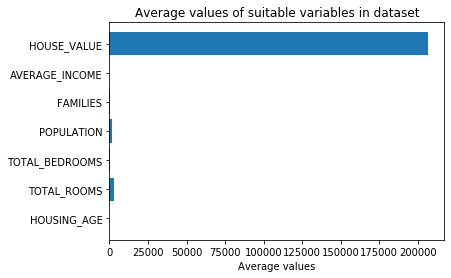

In [44]:
objects = ('HOUSING_AGE', 'TOTAL_ROOMS', 'TOTAL_BEDROOMS', 'POPULATION', 'FAMILIES', 'AVERAGE_INCOME', 'HOUSE_VALUE')
y_pos = np.arange(len(objects))
performance = [df['HOUSING_AGE'].mean(),df['TOTAL_ROOMS'].mean(),df['TOTAL_BEDROOMS'].mean(),df['POPULATION'].mean(),df['FAMILIES'].mean(),df['AVERAGE_INCOME'].mean(),df['HOUSE_VALUE'].mean()]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Average values')
plt.title('Average values of suitable variables in dataset')

plt.show()

3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

The average age of the house blocks near the ocean is OCEAN_PROXIMITY
<1H OCEAN     240084.0
INLAND        124805.0
ISLAND        380440.0
NEAR BAY      259212.0
NEAR OCEAN    249434.0
Name: HOUSE_VALUE, dtype: float64


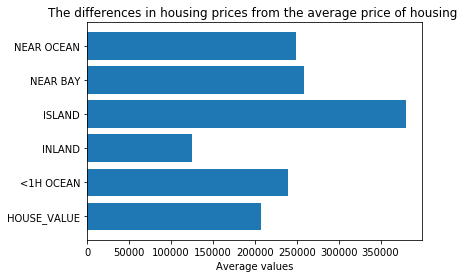

In [49]:
AverageHV = df.groupby('OCEAN_PROXIMITY')['HOUSE_VALUE'].mean()
print('The average age of the house blocks near the ocean is', round(AverageHV,0))

objects = ('HOUSE_VALUE','<1H OCEAN','INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN' )
y_pos = np.arange(len(objects))
performance = [df['HOUSE_VALUE'].mean(), 240084, 124805, 380440, 259212, 249434]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Average values')
plt.title('The differences in housing prices from the average price of housing ')

plt.show()

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [81]:
d= df['HOUSE_VALUE'].mean()
new=pd.DataFrame(df[df['OCEAN_PROXIMITY']== "NEAR OCEAN"])
new= new[new['HOUSE_VALUE'] < df['HOUSE_VALUE'].mean()]
new.to_csv(" Details of all housing blocks in a csv file having houses near oceans and lower than the average of the housing value")






2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [52]:
new4columns = df[['LONGITUDE', 'LATITUDE', 'TOTAL_ROOMS', 'HOUSE_VALUE']].copy()
new4columns.head(10)

,LONGITUDE,LATITUDE,TOTAL_ROOMS,HOUSE_VALUE
0,-122.23,37.88,880,452600
1,-122.22,37.86,7099,358500
2,-122.24,37.85,1467,352100
3,-122.25,37.85,1274,341300
4,-122.25,37.85,1627,342200
5,-122.25,37.85,919,269700
6,-122.25,37.84,2535,299200
7,-122.25,37.84,3104,241400
8,-122.26,37.84,2555,226700
9,-122.25,37.84,3549,261100


In [56]:
new4columns.to_csv('New housing dataset.csv')